In [4]:
import numpy as np
import pandas as pd

강남_대여소_ID = pd.read_csv('./전처리1/강남_따릉이_대여소_ID.csv',encoding='utf-8')


파일_목록 = [
    './전처리1/강남_따릉이_data_2023_01.csv',
    './전처리1/강남_따릉이_data_2023_02.csv',
    './전처리1/강남_따릉이_data_2023_03.csv',
    './전처리1/강남_따릉이_data_2023_04.csv'
]

데이터_목록 = []
for 파일_경로 in 파일_목록:
    데이터 = pd.read_csv(파일_경로, encoding='utf-8')
    데이터_목록.append(데이터)

# 데이터프레임들을 통합
따릉이_data = pd.concat(데이터_목록, ignore_index=True)
print(강남_대여소_ID)
print('*'*50)
print(따릉이_data)

      대여소_ID
0     ST-966
1     ST-963
2     ST-962
3     ST-961
4     ST-960
..       ...
186  ST-1174
187  ST-1173
188  ST-1172
189  ST-1171
190  ST-1170

[191 rows x 1 columns]
**************************************************
               기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수
0         20230101.0       0   ST-1590   ST-1590      1
1         20230101.0       0   ST-2127   ST-2127      1
2         20230101.0       5   ST-1286   ST-1286      1
3         20230101.0       5   ST-1780   ST-1780      1
4         20230101.0       5   ST-2018   ST-2018      2
...              ...     ...       ...       ...    ...
86434233  20231231.0    2355   ST-1609    ST-271      1
86434234  20231231.0    2355   ST-2305    ST-987      1
86434235  20231231.0    2355   ST-2481   ST-2481      1
86434236  20231231.0    2355   ST-2742   ST-1061      1
86434237  20231231.0    2355   ST-3011    ST-280      1

[86434238 rows x 5 columns]


# NaN하나라도 있는 자료 제거
 + 기준_날짜 int형

In [5]:
따릉이_data.dropna(inplace=True)

# '기준_날짜' 열을 정수형으로 변환
따릉이_data['기준_날짜'] = 따릉이_data['기준_날짜'].astype(int)

따릉이_data['전체_건수'] = 따릉이_data['전체_건수'].astype(int)
print(따릉이_data)

             기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수
0         20230101       0   ST-1590   ST-1590      1
1         20230101       0   ST-2127   ST-2127      1
2         20230101       5   ST-1286   ST-1286      1
3         20230101       5   ST-1780   ST-1780      1
4         20230101       5   ST-2018   ST-2018      2
...            ...     ...       ...       ...    ...
86434233  20231231    2355   ST-1609    ST-271      1
86434234  20231231    2355   ST-2305    ST-987      1
86434235  20231231    2355   ST-2481   ST-2481      1
86434236  20231231    2355   ST-2742   ST-1061      1
86434237  20231231    2355   ST-3011    ST-280      1

[86308807 rows x 5 columns]


# 시작, 종료 대여 건수 확인

In [6]:
강남_시작_data = 따릉이_data.groupby('시작_대여소_ID')['전체_건수'].sum()
강남_도착_data = 따릉이_data.groupby('종료_대여소_ID')['전체_건수'].sum()

# 시작 대여소별 대여 건수가 0인 경우 확인
강남_시작_data_zero = 강남_시작_data[강남_시작_data == 0]
print("시작 대여소별 대여 건수가 0인 경우:")
print(강남_시작_data_zero)

# 종료 대여소별 대여 건수가 0인 경우 확인
강남_도착_data_zero = 강남_도착_data[강남_도착_data == 0]
print("\n종료 대여소별 대여 건수가 0인 경우:")
print(강남_도착_data_zero)

print(강남_도착_data)

시작 대여소별 대여 건수가 0인 경우:
Series([], Name: 전체_건수, dtype: int32)

종료 대여소별 대여 건수가 0인 경우:
Series([], Name: 전체_건수, dtype: int32)
종료_대여소_ID
ST-10       46052
ST-1000     49171
ST-1002     86284
ST-1003     27393
ST-1004     10835
            ...  
ST-994      64624
ST-995       3950
ST-996       8184
ST-997      96476
X          352038
Name: 전체_건수, Length: 2802, dtype: int32


In [6]:
강남_시작_data_zero = 강남_시작_data[강남_시작_data == 0]
print("시작 대여소별 대여 건수가 0인 경우:")
print(강남_시작_data_zero)

# 종료 대여소별 대여 건수가 0인 경우 확인
강남_도착_data_zero = 강남_도착_data[강남_도착_data == 0]
print("\n종료 대여소별 대여 건수가 0인 경우:")
print(강남_도착_data_zero)

print(강남_도착_data)

시작 대여소별 대여 건수가 0인 경우:
Series([], Name: 전체_건수, dtype: int32)

종료 대여소별 대여 건수가 0인 경우:
Series([], Name: 전체_건수, dtype: int32)
종료_대여소_ID
ST-10       46052
ST-1000     49171
ST-1002     86284
ST-1003     27393
ST-1004     10835
            ...  
ST-994      64624
ST-995       3950
ST-996       8184
ST-997      96476
X          352038
Name: 전체_건수, Length: 2802, dtype: int32



# 시작 대여소별 대여 건수 시각화

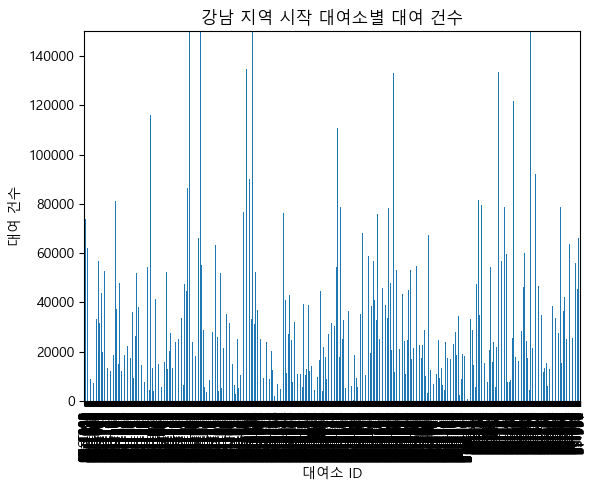

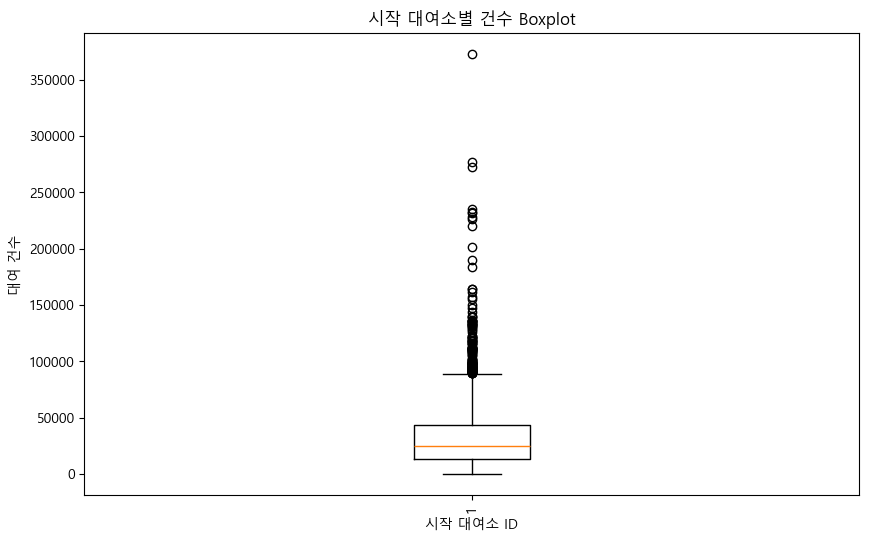

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

# 시작 대여소별 대여 건수 시각화
강남_시작_data.plot(kind='bar')
plt.title('강남 지역 시작 대여소별 대여 건수')
plt.xlabel('대여소 ID')
plt.ylabel('대여 건수')
plt.ylim(0, 150000)
plt.xticks(rotation=90)
plt.show()

# 시작 대여소별 건수 boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(따릉이_data.groupby('시작_대여소_ID')['전체_건수'].sum())
plt.title('시작 대여소별 건수 Boxplot')
plt.xlabel('시작 대여소 ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()



# 종료 대여소별 대여 건수 시각화

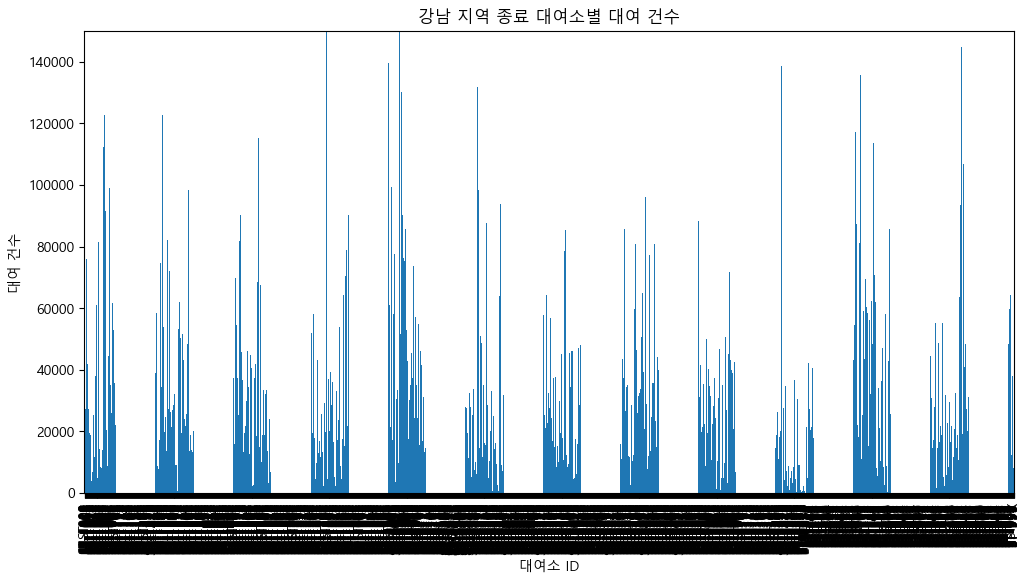

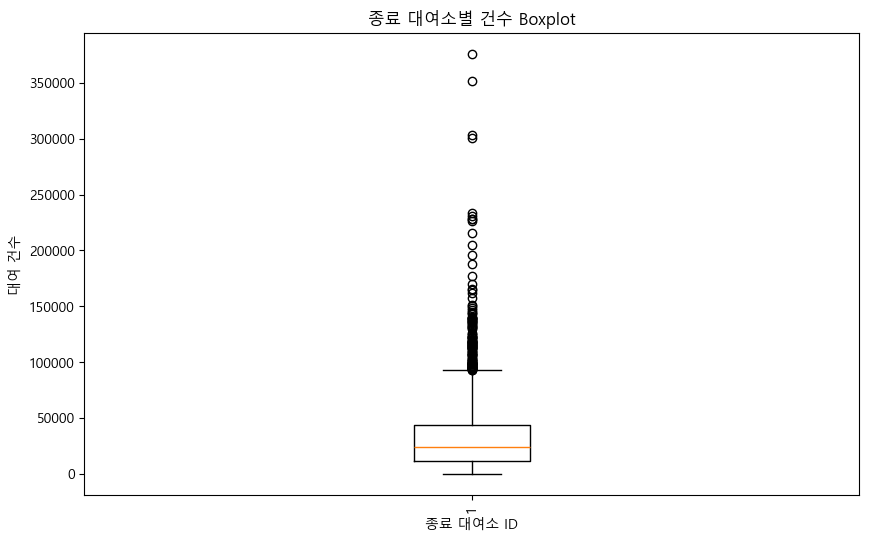

In [8]:

# 종료 대여소별 대여 건수 시각화
plt.figure(figsize=(12, 6))
강남_도착_data.plot(kind='bar')
plt.title('강남 지역 종료 대여소별 대여 건수')
plt.xlabel('대여소 ID')
plt.ylabel('대여 건수')
plt.ylim(0, 150000)
plt.xticks(rotation=90)
plt.show()


# 종료 대여소별 건수 boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(따릉이_data.groupby('종료_대여소_ID')['전체_건수'].sum())
plt.title('종료 대여소별 건수 Boxplot')
plt.xlabel('종료 대여소 ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

# 기준_시간대를 구간에 따라 확인 
시간은 임의로함

In [9]:

def divide_time_range(time):
    if time < 600:
        return '00:00~06:00'
    elif time < 1000:
        return '06:00~10:00'
    elif time < 1600:
        return '10:00~16:00'
    elif time < 2000:
        return '16:00~20:00'
    else:
        return '20:00~24:00'

따릉이_data['시간대_구간'] = 따릉이_data['기준_시간대'].apply(divide_time_range)

# 시간대 구간별로 건수 합산
따릉이_시간대별_건수 = 따릉이_data.groupby('시간대_구간')['전체_건수'].sum()

print(따릉이_시간대별_건수)

시간대_구간
00:00~06:00     6083937
06:00~10:00    16560762
10:00~16:00    22794649
16:00~20:00    28619624
20:00~24:00    17736058
Name: 전체_건수, dtype: int32


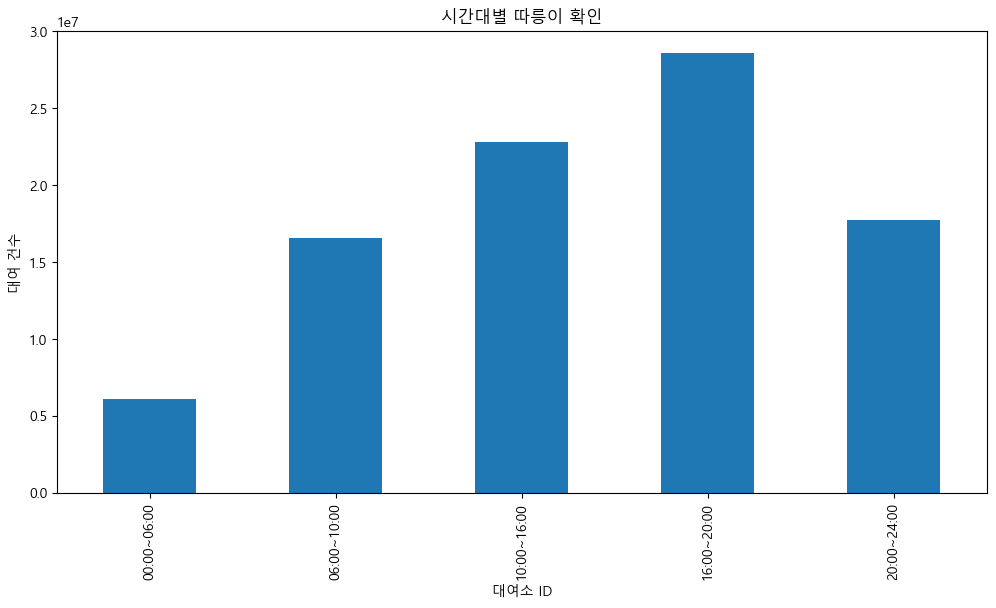

In [10]:
plt.figure(figsize=(12, 6))
따릉이_시간대별_건수.plot(kind='bar')
plt.title('시간대별 따릉이 확인')
plt.xlabel('대여소 ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

# 일 별 따릉이 data

In [15]:
따릉이_날짜별_건수 = 따릉이_data.groupby('기준_날짜')['전체_건수'].sum()


print(따릉이_날짜별_건수)

기준_날짜
20230101     78132
20230102    116572
20230103    125910
20230104    138804
20230105    140942
             ...  
20231227    169226
20231228    169286
20231229    172644
20231230     31290
20231231     60050
Name: 전체_건수, Length: 364, dtype: int32


c:\Users\ciw96\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ciw96\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ciw96\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ciw96\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ciw96\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:

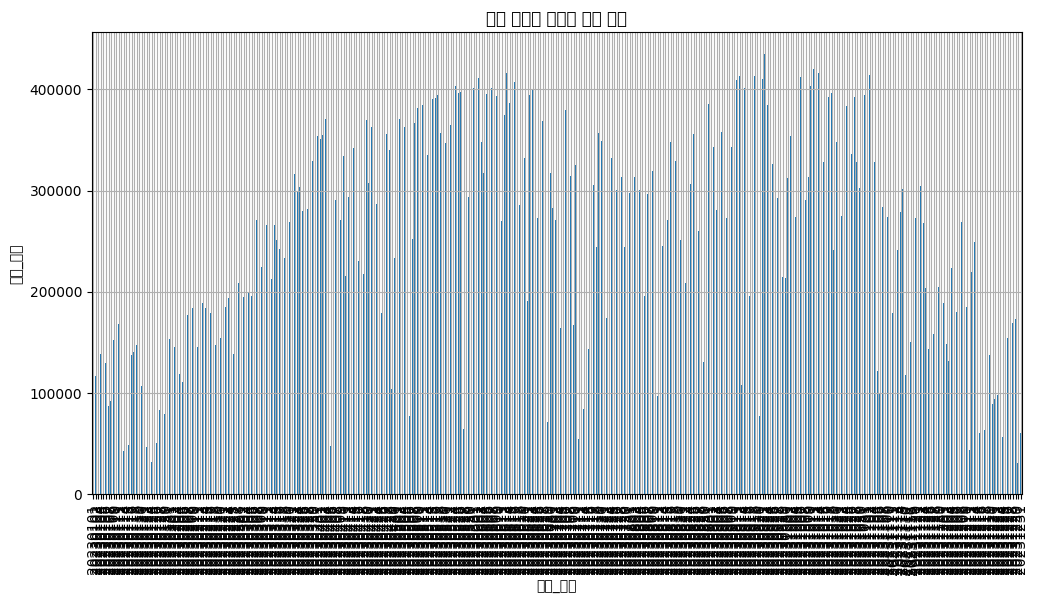

In [21]:
import matplotlib.pyplot as plt

# 대표적인 날짜 선택
대표적인_날짜 = 따릉이_날짜별_건수.index[::int(len(따릉이_날짜별_건수) / 6)]

# 대표적인 날짜에 해당하는 데이터 선택
대표적인_건수 = 따릉이_날짜별_건수.loc[대표적인_날짜]

# 그래프 그리기
plt.figure(figsize=(12, 6))
따릉이_날짜별_건수.plot(kind='bar')
plt.title('전체 날짜별 따릉이 대여 건수')
plt.xlabel('기준_날짜')
plt.ylabel('전체_건수')
plt.xticks(대표적인_날짜, rotation=45)
plt.grid(True)
plt.show()

프레임.groupby('기준_날짜')['전체_건수'].sum()
print(기준_날짜별_건수)